In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(rc={'figure.figsize': (15,15)})

dataframe = pd.read_csv('C:/Users/memdp/PYTHON_CODE/Datasets/running_times.csv')

# Show data types of columns
print('datatypes', dataframe.dtypes)

datatypes Rank               int64
Time              object
Name              object
Country           object
Date of Birth     object
Place            float64
City              object
Date              object
Gender            object
Event             object
dtype: object


In [2]:
# Show first 10 observations of dataframe
dataframe.head(10)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m
5,6,00:01:41.330000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2011-10-09,Men,800 m
6,7,00:01:41.510000,David Rudisha,KEN,1988-12-17,1.0,Heusden-Zolder,2010-10-07,Men,800 m
7,8,00:01:41.540000,David Rudisha,KEN,1988-12-17,1.0,Saint-Denis,2012-06-07,Men,800 m
8,9,00:01:41.730000,Sebastian Coe,GBR,1956-09-29,1.0,Firenze,1981-10-06,Men,800 m
9,9,00:01:41.730000,Wilson Kipketer,DEN,1970-12-12,1.0,Stockholm,1997-07-07,Men,800 m


In [3]:
# Check which column missing values are located
for column in dataframe.columns:
    print(f'The number of null values in {column} is {sum(dataframe[column].isnull())}')

The number of null values in Rank is 0
The number of null values in Time is 0
The number of null values in Name is 0
The number of null values in Country is 0
The number of null values in Date of Birth is 0
The number of null values in Place is 8
The number of null values in City is 0
The number of null values in Date is 0
The number of null values in Gender is 0
The number of null values in Event is 0


In [4]:
# View the observations that have missing values
null_data = dataframe[dataframe.isnull().any(axis=1)]
null_data

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
5891,791,00:01:58.100000,Mariya Savinova,RUS,1985-08-13,NaN,Lausanne,2012-08-23,Women,800 m
9711,519,00:00:22.300000,Jackie Joyner-Kersee,USA,1962-03-03,NaN,Indianapolis,1988-07-15,Women,200 m
10005,788,00:00:22.390000,Dafne Schippers,NED,1992-06-15,NaN,Götzis,2015-05-30,Women,200 m
12144,914,00:04:02.330000,Olga Zhuravlyova,RUS,1956-01-01,NaN,Kiev,1984-06-22,Women,1500 m
12152,923,00:04:02.350000,Ravilya Agletdinova,BLR,1960-10-02,NaN,Kiev,1984-06-22,Women,1500 m
12153,923,00:04:02.350000,Nadezhda Ralldugina,RUS,1957-11-15,NaN,Kiev,1984-06-22,Women,1500 m
12158,929,00:04:02.370000,Lyudmila Veselkova,RUS,1950-10-25,NaN,Kiev,1984-06-22,Women,1500 m
15078,832,00:14:58.790000,Elvan Abeylegesse,TUR,1982-11-09,NaN,Beijing,2008-08-19,Women,5000 m


In [5]:
# # Replace NaN
# dataframe_place = dataframe['Place'].fillna(0)
# dataframe_place

In [6]:
# to_datetime -> convert arg to datetime
def get_age():
    dataframe['Date'] = pd.to_datetime(dataframe.Date)
    dataframe['Date of Birth'] = pd.to_datetime(dataframe['Date of Birth'])
    dataframe['Age'] = (dataframe['Date'] - dataframe['Date of Birth']).apply(lambda x: int(x.days/365))
    return dataframe

# Create column age
get_age()

# Check dataframe
dataframe.tail(3)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
18241,1000,00:03:33.250000,Hudson Santos de Souza,BRA,1977-02-25,5.0,Rieti,2005-08-28,Men,1500 m,28
18242,1000,00:03:33.250000,Issac Songok,KEN,1984-04-25,2.0,Stockholm,2006-07-25,Men,1500 m,22
18243,1000,00:03:33.250000,Bethwell Birgen,KEN,1988-08-06,7.0,Lausanne,2012-08-23,Men,1500 m,24


In [7]:
print('The shape of the dataset:', dataframe.shape)

# Exact row duplicates, not a subset duplicate
print("Number of duplicated observations:", sum(dataframe.duplicated()))

# Drop duplicates and show new shape
dataframe_drop = dataframe.drop_duplicates()
print("The new shape:", dataframe_drop.shape)

The shape of the dataset: (18244, 11)
Number of duplicated observations: 12
The new shape: (18232, 11)


In [8]:
# Checking that age column has been added
dataframe.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,23
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m,21
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m,21
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m,26
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,26


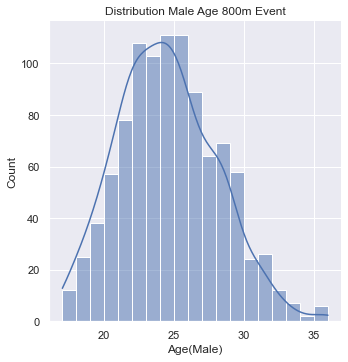

In [9]:
age_dist_male = dataframe['Age'][dataframe.Gender == 'Men'].loc[dataframe.Event == '800 m']
# Plot a gaussian kernel density est.
# along with the histogram
ax = sns.displot(age_dist_male, kde=True)
ax.set(label='Men Age Dist.', xlabel='Age(Male)',
       title='Distribution Male Age 800m Event')
# Histogram is right-skewed
# Younger males participate more in these events

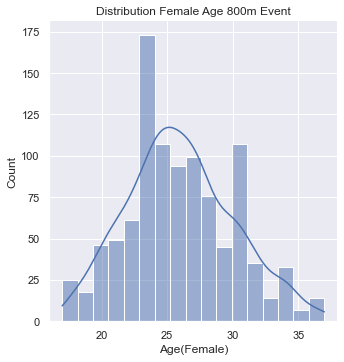

In [10]:
dist = dataframe['Age'][dataframe.Gender == 'Women'].loc[dataframe.Event == '800 m']
# Plot a gaussian kernel density est.
# along with the histogram
ax = sns.displot(dist, kde=True)
ax.set(label='Female Age Dist.', xlabel='Age(Female)',
       title='Distribution Female Age 800m Event')
# Histogram is somewhat normal with a peak at 21/22 yr
# old women participating the most

The average woman who participates is 28 years old


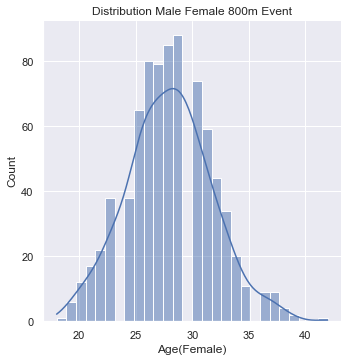

In [11]:
dist = dataframe['Age'][dataframe.Country == 'KEN'].loc[dataframe.Event == 'Marathon']
# Plot a gaussian kernel density est.
# along with the histogram
ax = sns.displot(dist, kde=True)
ax.set(label='Female Age Dist.', xlabel='Age(Female)',
       title='Distribution Male Female 800m Event')
mean = math.ceil(dist.mean())
print('The average woman who participates is {} years old'.format(mean))
# Histogram is normally distributed with mean at around
# 28 year old women participating the most in marathons

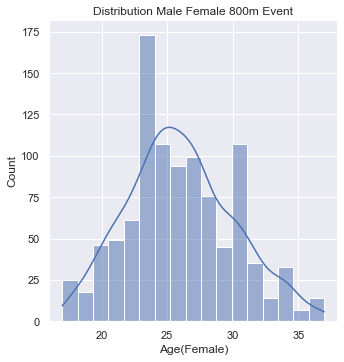

In [12]:
age_dist_female = dataframe['Age'][dataframe.Gender == 'Women'].loc[dataframe.Event == '800 m']
# Plot a gaussian kernel density est.
# along with the histogram
ax = sns.displot(age_dist_female, kde=True)
ax.set(label='Female Age Dist.', xlabel='Age(Female)',
       title='Distribution Male Female 800m Event')

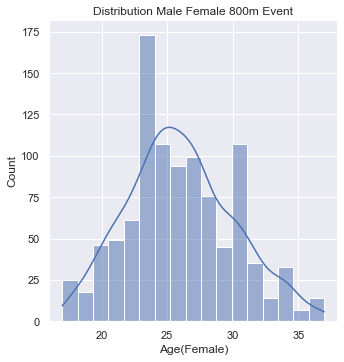

In [13]:
age_dist_female = dataframe['Age'][dataframe.Gender == 'Women'].loc[dataframe.Event == '800 m']
# Plot a gaussian kernel density est.
# along with the histogram
ax = sns.displot(age_dist_female, kde=True)
ax.set(label='Female Age Dist.', xlabel='Age(Female)',
       title='Distribution Male Female 800m Event')

In [14]:
# Group by City
dataframe.groupby(['Place', 'Time'])['Country'].count()

Place  Time           
1.0    00:00:09.580000    1
       00:00:09.630000    1
       00:00:09.690000    3
       00:00:09.720000    2
       00:00:09.740000    2
                         ..
17.0   00:31:50.350000    1
18.0   00:31:36.440000    1
       00:31:43.740000    1
19.0   00:31:36.900000    1
20.0   00:31:44.440000    1
Name: Country, Length: 10222, dtype: int64

<AxesSubplot:ylabel='City'>

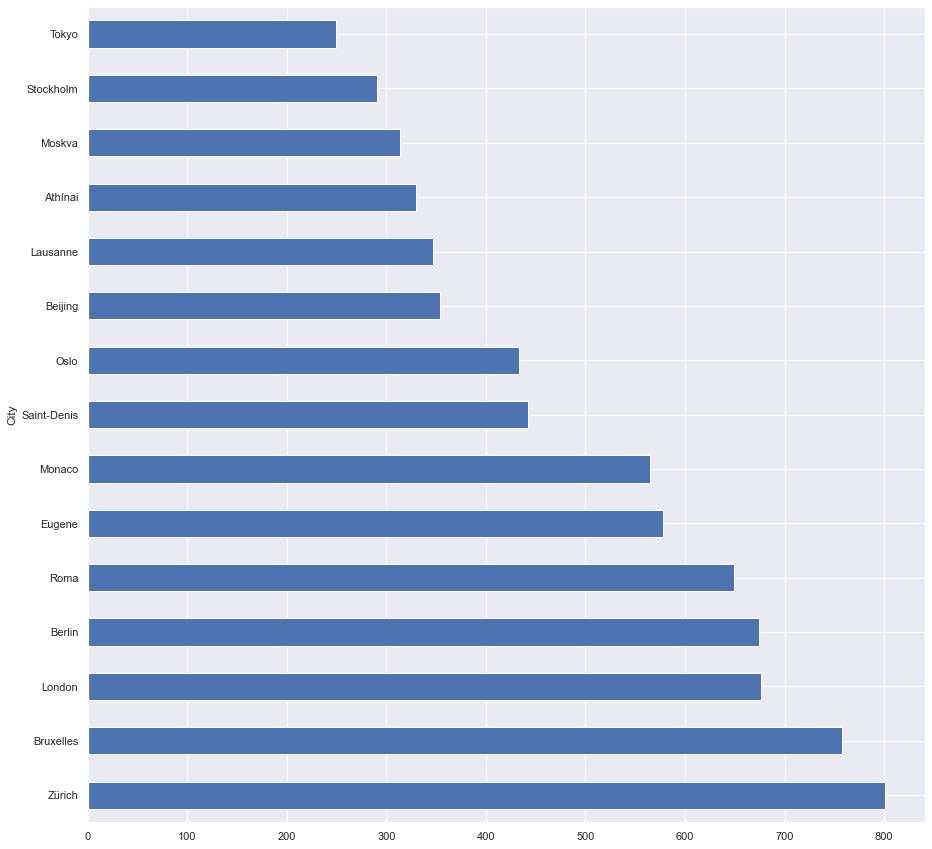

In [15]:
cities_plot = dataframe.groupby(['City'])['City'].count().sort_values(ascending=False)[:15]
plt.figure(figsize=(15,15))
cities_plot.plot.barh()

In [16]:
# Exploring marathon event w/ Male

dataframe[dataframe.Event == 'Marathon'].loc[dataframe.Gender == 'Men'].head(10)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
3001,1,02:02:57,Dennis Kimetto,KEN,1984-04-22,1.0,Berlin,2014-09-28,Men,Marathon,30
3002,2,02:03:02,Geoffrey Mutai,KEN,1981-10-07,1.0,Boston,2011-04-18,Men,Marathon,29
3003,3,02:03:03,Kenenisa Bekele,ETH,1982-06-13,1.0,Berlin,2016-09-25,Men,Marathon,34
3004,4,02:03:05,Eliud Kipchoge,KEN,1984-11-05,1.0,London,2016-04-24,Men,Marathon,31
3005,5,02:03:06,Moses Mosop,KEN,1985-07-17,2.0,Boston,2011-04-18,Men,Marathon,25
3006,6,02:03:13,Emmanuel Mutai,KEN,1984-10-12,2.0,Berlin,2014-09-28,Men,Marathon,29
3007,6,02:03:13,Wilson Kipsang Kiprotich,KEN,1982-03-15,2.0,Berlin,2016-09-25,Men,Marathon,34
3008,8,02:03:23,Wilson Kipsang Kiprotich,KEN,1982-03-15,1.0,Berlin,2013-09-29,Men,Marathon,31
3009,9,02:03:38,Patrick Makau,KEN,1985-03-02,1.0,Berlin,2011-09-25,Men,Marathon,26
3010,10,02:03:42,Wilson Kipsang Kiprotich,KEN,1982-03-15,1.0,Frankfurt,2011-10-30,Men,Marathon,29


In [17]:
# Exploring 100 m event w/ Male

dataframe[dataframe.Event == '100 m'].loc[dataframe.Gender == 'Men'].head(10)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
6088,1,00:00:09.580000,Usain Bolt,JAM,1986-08-21,1.0,Berlin,2009-08-16,Men,100 m,23
6089,2,00:00:09.630000,Usain Bolt,JAM,1986-08-21,1.0,London,2012-08-05,Men,100 m,25
6090,3,00:00:09.690000,Usain Bolt,JAM,1986-08-21,1.0,Beijing,2008-08-16,Men,100 m,22
6091,3,00:00:09.690000,Tyson Gay,USA,1982-08-09,1.0,Shanghai,2009-09-20,Men,100 m,27
6092,3,00:00:09.690000,Yohan Blake,JAM,1989-12-26,1.0,Lausanne,2012-08-23,Men,100 m,22
6093,6,00:00:09.710000,Tyson Gay,USA,1982-08-09,2.0,Berlin,2009-08-16,Men,100 m,27
6094,7,00:00:09.720000,Usain Bolt,JAM,1986-08-21,1.0,New York City,2008-05-31,Men,100 m,21
6095,7,00:00:09.720000,Asafa Powell,JAM,1982-11-23,1.0,Lausanne,2008-09-02,Men,100 m,25
6096,9,00:00:09.740000,Asafa Powell,JAM,1982-11-23,1.0,Rieti,2007-09-09,Men,100 m,24
6097,9,00:00:09.740000,Justin Gatlin,USA,1982-02-10,1.0,Ad-Dawhah,2015-05-15,Men,100 m,33


In [18]:
Kipchoge_10k = dataframe[dataframe.Name == 'Eliud Kipchoge'].loc[dataframe.Event == '10,000 m']
# Sort by Place
Kipchoge_10k.sort_values(by=['Place', 'Age'])

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
2040,34,00:26:49.020000,Eliud Kipchoge,KEN,1984-11-05,2.0,Hengelo,2007-05-26,Men,"10,000 m",22
2081,75,00:26:54.320000,Eliud Kipchoge,KEN,1984-11-05,3.0,Hengelo,2008-05-24,Men,"10,000 m",23
2076,70,00:26:53.270000,Eliud Kipchoge,KEN,1984-11-05,5.0,Bruxelles,2011-09-16,Men,"10,000 m",26
2228,221,00:27:11.930000,Eliud Kipchoge,KEN,1984-11-05,7.0,Eugene,2012-06-01,Men,"10,000 m",27


In [19]:
m = (dataframe.Event == '100 m') & (dataframe.Age <= 23)
Bolt_100m = dataframe[dataframe.Name == 'Usain Bolt'].loc[m]

print('The shape of the subset for Bolt is:', Bolt_100m.shape)

Bolt_100m

The shape of the subset for Bolt is: (21, 11)


,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
6088,1,00:00:09.580000,Usain Bolt,JAM,1986-08-21,1.0,Berlin,2009-08-16,Men,100 m,23
6090,3,00:00:09.690000,Usain Bolt,JAM,1986-08-21,1.0,Beijing,2008-08-16,Men,100 m,22
6094,7,00:00:09.720000,Usain Bolt,JAM,1986-08-21,1.0,New York City,2008-05-31,Men,100 m,21
6102,15,00:00:09.760000,Usain Bolt,JAM,1986-08-21,1.0,Kingston,2008-05-03,Men,100 m,21
6110,19,00:00:09.770000,Usain Bolt,JAM,1986-08-21,1.0,Bruxelles,2008-09-05,Men,100 m,22
6122,34,00:00:09.790000,Usain Bolt,JAM,1986-08-21,1.0,Saint-Denis,2009-07-17,Men,100 m,22
6135,48,00:00:09.810000,Usain Bolt,JAM,1986-08-21,1.0,Zürich,2009-08-28,Men,100 m,23
6143,51,00:00:09.820000,Usain Bolt,JAM,1986-08-21,1.0,Lausanne,2010-07-08,Men,100 m,23
6151,63,00:00:09.830000,Usain Bolt,JAM,1986-08-21,1.0,Zürich,2008-08-29,Men,100 m,22
6163,69,00:00:09.840000,Usain Bolt,JAM,1986-08-21,1.0,Saint-Denis,2010-07-16,Men,100 m,23
